In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train , y_train),(X_test , y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane" , "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

In [ ]:
def plot_sample(X , y ,index):
   plt.figure(figsize=(15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[y[index]])


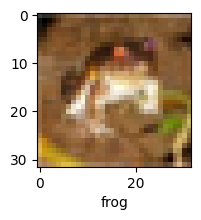

In [ ]:
plot_sample(X_train , y_train ,0)


In [ ]:
X_train= X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8115 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6218 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5417 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4824 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4354 - accuracy: 0.4953


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.47      0.54      1000
           1       0.67      0.54      0.60      1000
           2       0.27      0.62      0.38      1000
           3       0.31      0.50      0.39      1000
           4       0.44      0.32      0.37      1000
           5       0.61      0.17      0.26      1000
           6       0.53      0.51      0.52      1000
           7       0.61      0.47      0.53      1000
           8       0.63      0.61      0.62      1000
           9       0.60      0.54      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.53      0.47      0.48     10000
weighted avg       0.53      0.47      0.48     10000



Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([

        #cnn
        layers.Conv2D(filters=64 , kernel_size = (3,3), activation = 'relu' , input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=32 , kernel_size = (3,3), activation = 'relu' , input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        #dense

        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax'),

    ])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4471 - accuracy: 0.4809
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1119 - accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9884 - accuracy: 0.6540
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8940 - accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8248 - accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7669 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7107 - accuracy: 0.7491
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6548 - accuracy: 0.7684
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6129 - accuracy: 0.7834
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.571

In [ ]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9448 - accuracy: 0.6943


[0.944817304611206, 0.6942999958992004]

In [ ]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

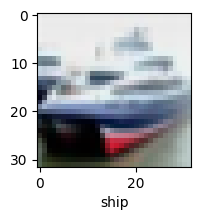

In [ ]:
plot_sample(X_test , y_test , 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[0:5]

313/313 [==============================] - 1s 3ms/step


array([[2.18616275e-04, 4.67320970e-05, 1.12580594e-04, 9.75084841e-01,
        2.78950727e-04, 1.75467059e-02, 6.53070211e-03, 1.91939557e-06,
        1.68756116e-04, 1.01784899e-05],
       [1.62336491e-02, 1.66463315e-01, 1.12561942e-07, 6.00515591e-07,
        5.05484472e-08, 8.11379408e-09, 8.96272034e-09, 3.44467956e-08,
        8.15505087e-01, 1.79709913e-03],
       [1.75549686e-02, 5.79623282e-02, 6.10052084e-05, 1.11182162e-03,
        2.67121068e-04, 1.97885565e-05, 2.94053507e-06, 3.57540586e-04,
        9.15262401e-01, 7.40006240e-03],
       [4.28866804e-01, 1.53478086e-02, 2.87204444e-01, 1.66777410e-02,
        1.37978956e-01, 1.04068825e-03, 8.11661535e-04, 7.20713567e-03,
        1.04671694e-01, 1.93202475e-04],
       [3.21115827e-08, 7.52738415e-05, 1.01012373e-02, 1.27530778e-02,
        8.31520319e-01, 3.74560768e-04, 1.45166665e-01, 6.12190570e-06,
        2.74195668e-06, 2.11933919e-08]], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[0:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
print("Classification Report: \n" , classification_report(y_test , y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.77      0.84      0.80      1000
           2       0.60      0.60      0.60      1000
           3       0.53      0.42      0.47      1000
           4       0.66      0.67      0.66      1000
           5       0.56      0.64      0.59      1000
           6       0.74      0.79      0.76      1000
           7       0.73      0.74      0.74      1000
           8       0.82      0.77      0.79      1000
           9       0.80      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

